In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
#load the dataset
jobs_gb_clean = pd.read_csv('jobs_gb_cleaned.csv')
jobs_gb_clean.head()

,id,title,company,location,category,created,url,description,salary_min,salary_max,contract_type,contract_time,salary_avg
0,5185229320,Early Years Educator Nursery,Partou,"Ware, Hertfordshire",Teaching Jobs,2025-05-07 14:32:36+00:00,https://www.adzuna.co.uk/jobs/details/51852293...,"Join Partou, where we put children in the lead...",27600.0,27600.0,permanent,part_time,27600.0
1,5172986638,Housekeeping Assistant - Bank - Care Home,Barchester Healthcare,"Melbourn, Royston",Domestic help & Cleaning Jobs,2025-05-01 13:32:39+00:00,https://www.adzuna.co.uk/jobs/details/51729866...,ABOUT THE ROLE As a Bank Housekeeping Assistan...,29619.0,29619.0,unknown,unknown,29619.0
2,5190346944,Care Home Administrator,Barchester Healthcare,"Harlow Green, Gateshead",Admin Jobs,2025-05-09 13:37:28+00:00,https://www.adzuna.co.uk/jobs/details/51903469...,Barchester Healthcare are looking for an exper...,28000.0,28000.0,permanent,unknown,28000.0
3,5149584869,Care Assistant - Bank - Care Home,Barchester Healthcare,"Wilton, Salisbury",Healthcare & Nursing Jobs,2025-04-17 13:30:03+00:00,https://www.adzuna.co.uk/jobs/details/51495848...,ABOUT THE ROLE As a Bank Care Assistant at a B...,33342.0,33342.0,unknown,unknown,33342.0
4,5172986642,Activities Assistant - Care Home,Barchester Healthcare,"Badgeworth, Cheltenham",Hospitality & Catering Jobs,2025-05-01 13:32:39+00:00,https://www.adzuna.co.uk/jobs/details/51729866...,ABOUT THE ROLE As an Activities Assistant at a...,26436.0,26436.0,permanent,unknown,26436.0


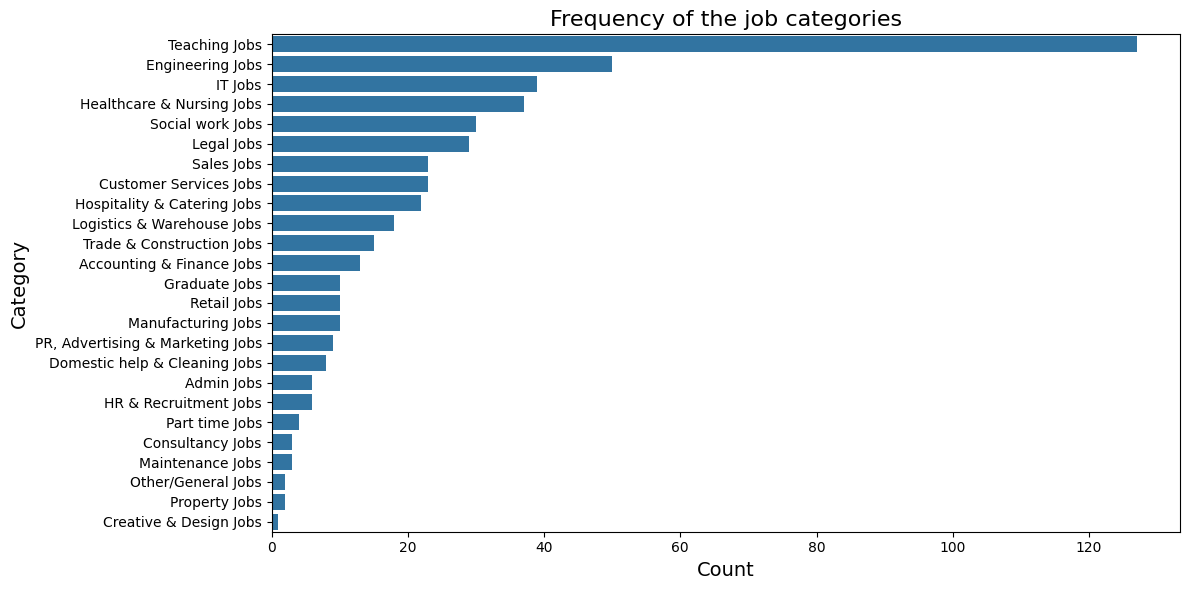

In [34]:
# Frequency of the most common job categories
plt.figure(figsize=(12,6))
sns.countplot(data=jobs_gb_clean, y='category', order=jobs_gb_clean['category'].value_counts().index)
plt.title('Frequency of the job categories', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Category', fontsize=14)
plt.tight_layout()
plt.show()


In [ ]:
# Distribution of job postings per region/city



C:\Users\Esther\AppData\Local\Temp\ipykernel_17100\2837438020.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=salary_by_category, x='salary_avg', y='category', palette='viridis')


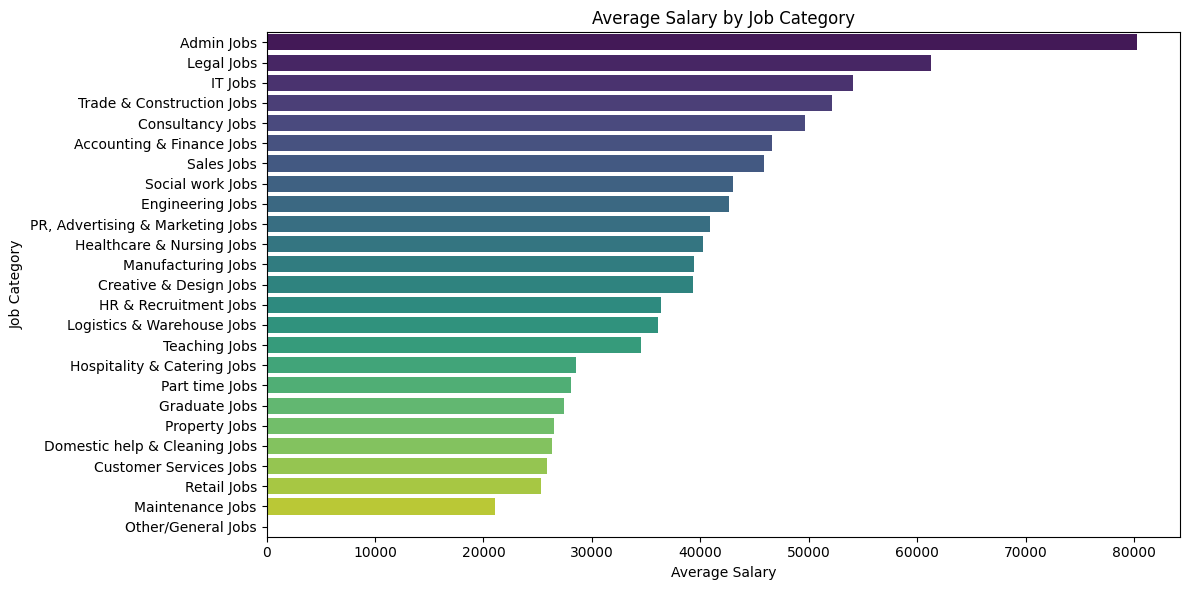

In [35]:
# Create a DataFrame from the Series
salary_by_category = jobs_gb_clean.groupby('category')['salary_avg'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=salary_by_category, x='salary_avg', y='category', palette='viridis')

plt.title('Average Salary by Job Category')
plt.xlabel('Average Salary')
plt.ylabel('Job Category')
plt.tight_layout()
plt.show()

In [37]:
jobs_gb_clean.dtypes

id                 int64
title             object
company           object
location          object
category          object
created           object
url               object
description       object
salary_min       float64
salary_max       float64
contract_type     object
contract_time     object
salary_avg       float64
dtype: object

C:\Users\Esther\AppData\Local\Temp\ipykernel_17100\119305233.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  job_trend = jobs_gb_clean.groupby(jobs_gb_clean['created'].dt.to_period('M')).size()


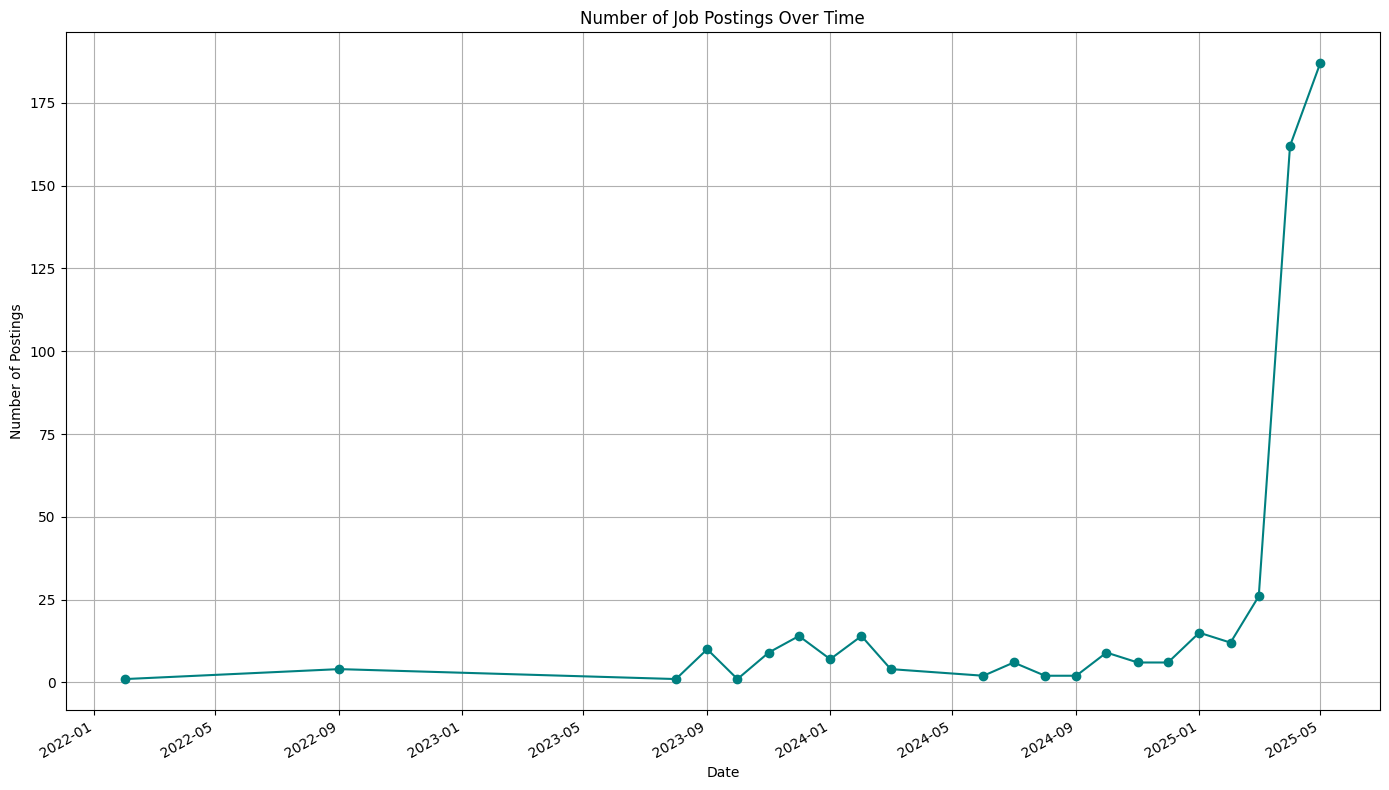

In [47]:
# Convert the created datatype to datetime
jobs_gb_clean['created'] = pd.to_datetime(jobs_gb_clean['created'], errors='coerce')

# Group by month
job_trend = jobs_gb_clean.groupby(jobs_gb_clean['created'].dt.to_period('M')).size()
job_trend.index = job_trend.index.to_timestamp()  # convert PeriodIndex to datetime

plt.figure(figsize=(14, 8))
job_trend.plot(marker='o', color='teal')

plt.title('Number of Job Postings Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Postings')
plt.grid(True)
plt.tight_layout()
plt.show()